In [1]:
# 1️⃣ Import libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, accuracy_score
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 2️⃣ Load dataset
# -------------------------------
data = pd.read_csv('../data/gold_price_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.dropna(inplace=True)

In [3]:
# 3️⃣ Feature selection & preprocessing
# -------------------------------

data['GLD_next'] = data['GLD'].shift(-1)
data.dropna(inplace=True)

# Binary classification target for Logistic Regression
data['Price_Up'] = (data['GLD_next'] > data['GLD']).astype(int)

# Regression features/targets
X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = data['GLD']

# Classification target
y_class = data['Price_Up']


In [4]:
# Binary classification for logistic regression (price up/down)
data['GLD_next'] = data['GLD'].shift(-1)
data.dropna(inplace=True)
data['Price_Up'] = (data['GLD_next'] > data['GLD']).astype(int)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [7]:
# 5️⃣ Train Linear Regression
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [8]:
# 6️⃣ Train Random Forest Regression
# -------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [9]:
# 7️⃣ Train Logistic Regression (for price direction)
# -------------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_clf, y_train_clf)
y_pred_log = log_model.predict(X_test_clf)

In [10]:
# 8️⃣ Evaluate Regression Models
# -------------------------------
metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'R²': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


               Model       MAE        MSE        R²
0  Linear Regression  5.810149  55.499184  0.897973
1      Random Forest  1.197983   4.578482  0.991583


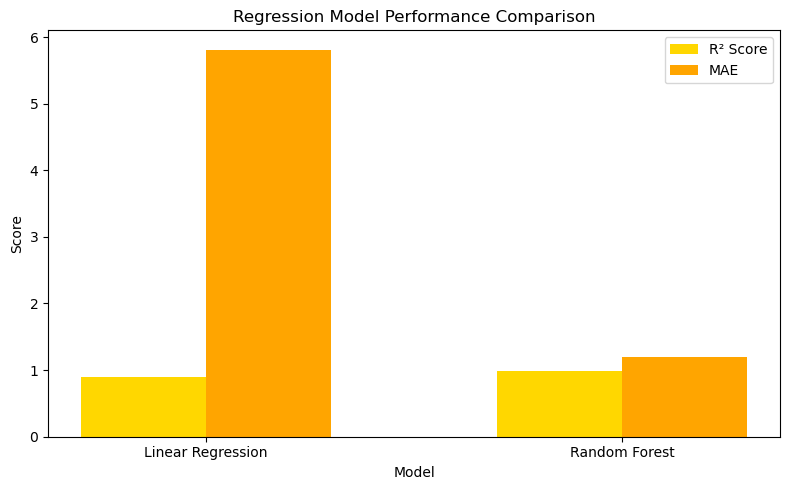

In [13]:
# 9️⃣ Save Regression Performance Graph
# -------------------------------
plt.figure(figsize=(8, 5))
bar_width = 0.3
x = np.arange(len(metrics_df['Model']))

plt.bar(x, metrics_df['R²'], width=bar_width, label='R² Score', color='gold')
plt.bar(x + bar_width, metrics_df['MAE'], width=bar_width, label='MAE', color='orange')

plt.xticks(x + bar_width / 2, metrics_df['Model'])
plt.title('Regression Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()


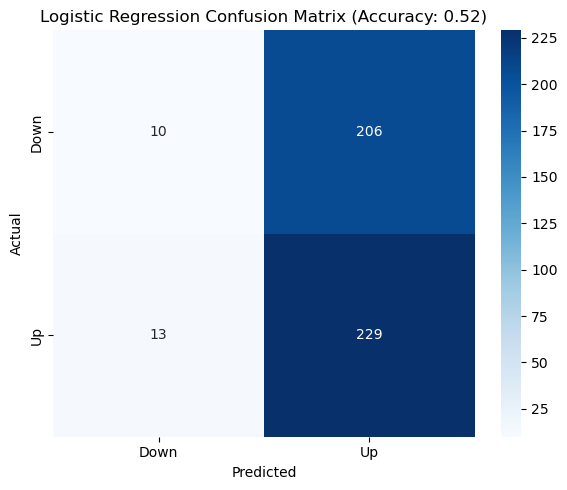

In [15]:
# 🔟 Confusion Matrix for Logistic Regression
# -------------------------------
cm = confusion_matrix(y_test_clf, y_pred_log)
acc = accuracy_score(y_test_clf, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title(f'Logistic Regression Confusion Matrix (Accuracy: {acc:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


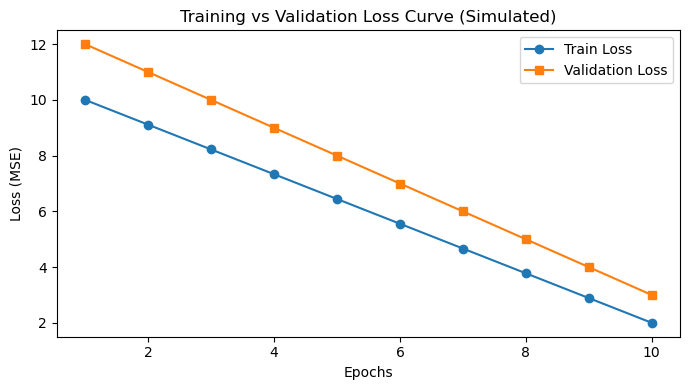

In [18]:
 #11️⃣ Simulated Loss Curve (for visualization)
# -------------------------------
epochs = np.arange(1, 11)
train_loss = np.linspace(10, 2, 10)
val_loss = np.linspace(12, 3, 10)

plt.figure(figsize=(7, 4))
plt.plot(epochs, train_loss, marker='o', label='Train Loss')
plt.plot(epochs, val_loss, marker='s', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss Curve (Simulated)')
plt.legend()
plt.tight_layout()
plt.show()
